C:\Users\victo\AppData\Local\Temp\ipykernel_2072\3255036224.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  duck = imageio.imread("duck.jpg")


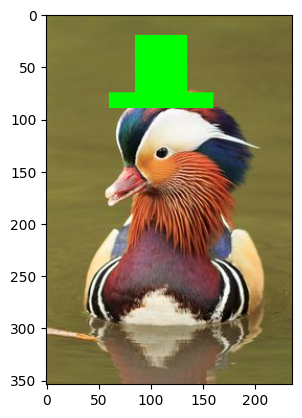

In [18]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

# Read in the image
duck = imageio.imread("duck.jpg")

duck_copy = duck.copy()

# Main hat is a green rectangle with top-left
# at (20,85) bottom-right corner at (75, 135)
duck_copy[20:75, 85:135, 0] = 0
duck_copy[20:75, 85:135, 1] = 255
duck_copy[20:75, 85:135, 2] = 0

# Main hat is a green rectangle with top-left
# at (75,60) bottom-right corner at (90, 160)
duck_copy[75:90, 60:160, 0] = 0
duck_copy[75:90, 60:160, 1] = 255
duck_copy[75:90, 60:160, 2] = 0

picture = plt.imshow(duck_copy)